# Data Preprocessing and Exploration

-This notebook initiates the model selection process by exploring the data and preprocessing it for model training and furthur processing.The data used is 2 years sales data of an online retailer in the UK between December 2009 and January 2012.

In [40]:
#Import relevant libraries
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gr

In [3]:
df1 = pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2009-2010")
df2 = pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2010-2011")
df1


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [4]:
print("Min Date:", df1["InvoiceDate"].min())
print("Max Date:", df1["InvoiceDate"].max())


Min Date: 2009-12-01 07:45:00
Max Date: 2010-12-09 20:01:00


In [5]:
print("Min Date:", df2["InvoiceDate"].min())
print("Max Date:", df2["InvoiceDate"].max())


Min Date: 2010-12-01 08:26:00
Max Date: 2011-12-09 12:50:00


In [6]:
df1["year"] = df1["InvoiceDate"].dt.year
df1["date"] = df1["InvoiceDate"].dt.date
df2["year"] = df2["InvoiceDate"].dt.year
df2["date"] = df2["InvoiceDate"].dt.date
df1


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010,2010-12-09
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010,2010-12-09
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010,2010-12-09
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010,2010-12-09


In [7]:
print("D1 MAX:", df1["InvoiceDate"].max())
print("D2 MIN:", df2["InvoiceDate"].min())

D1 MAX: 2010-12-09 20:01:00
D2 MIN: 2010-12-01 08:26:00


In [8]:
# Concatenate the DataFrames
merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,2011-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,2011-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,2011-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,2011-12-09


In [9]:
print("Merged max :", merged_df["InvoiceDate"].max())
print("Merged min :", merged_df["InvoiceDate"].min())

Merged max : 2011-12-09 12:50:00
Merged min : 2009-12-01 07:45:00


In [10]:
merged_df.to_csv("uk_dataset_full.csv")

In [11]:
merged_df["year"].value_counts()

year
2010    522714
2011    499429
2009     45228
Name: count, dtype: int64

In [12]:
merged_df["Quantity"].min()

-80995

In [13]:
merged_df = merged_df[merged_df["Quantity"]>0]
merged_df.shape

(1044421, 10)

In [14]:
merged_daily = merged_df.groupby('date')['Quantity'].sum().reset_index()
merged_daily

,date,Quantity
0,2009-12-01,26434
1,2009-12-02,31938
2,2009-12-03,50898
3,2009-12-04,21405
4,2009-12-05,5119
...,...,...
599,2011-12-05,44664
600,2011-12-06,30469
601,2011-12-07,41980
602,2011-12-08,35672


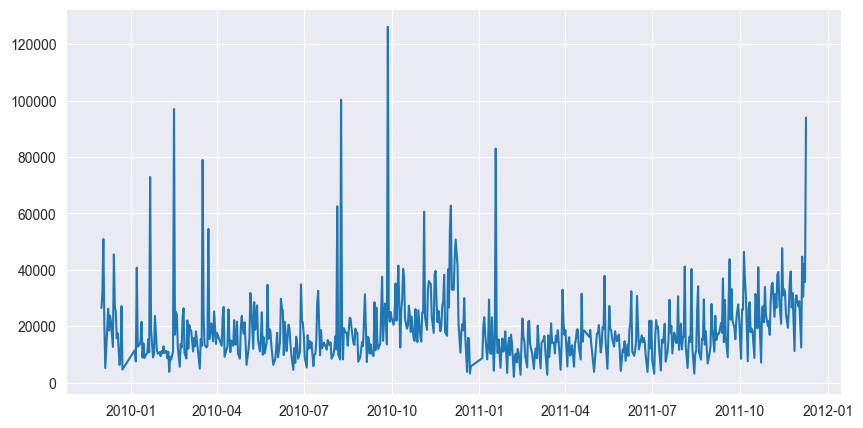

In [15]:
plt.figure(figsize=(10,5))
plt.plot(merged_daily["date"],merged_daily["Quantity"]);

In [41]:
def find_date_range(df):
    min_date =df['date'].min()
    max_date = df['date'].max()
    date_range = pd.date_range(start=min_date, end=max_date)
    df = df.set_index('date').reindex(date_range).rename_axis('date').reset_index()
    return  df
    

In [16]:
df = find_date_range(merged_daily)
df.shape

(739, 2)

In [17]:
merged_daily.shape

(604, 2)

In [18]:
df.isna().sum()

date          0
Quantity    135
dtype: int64

In [19]:
df.interpolate(method='linear', inplace=True)

In [20]:
df['Quantity'] = df['Quantity'].ffill()
df.isna().sum()

date        0
Quantity    0
dtype: int64

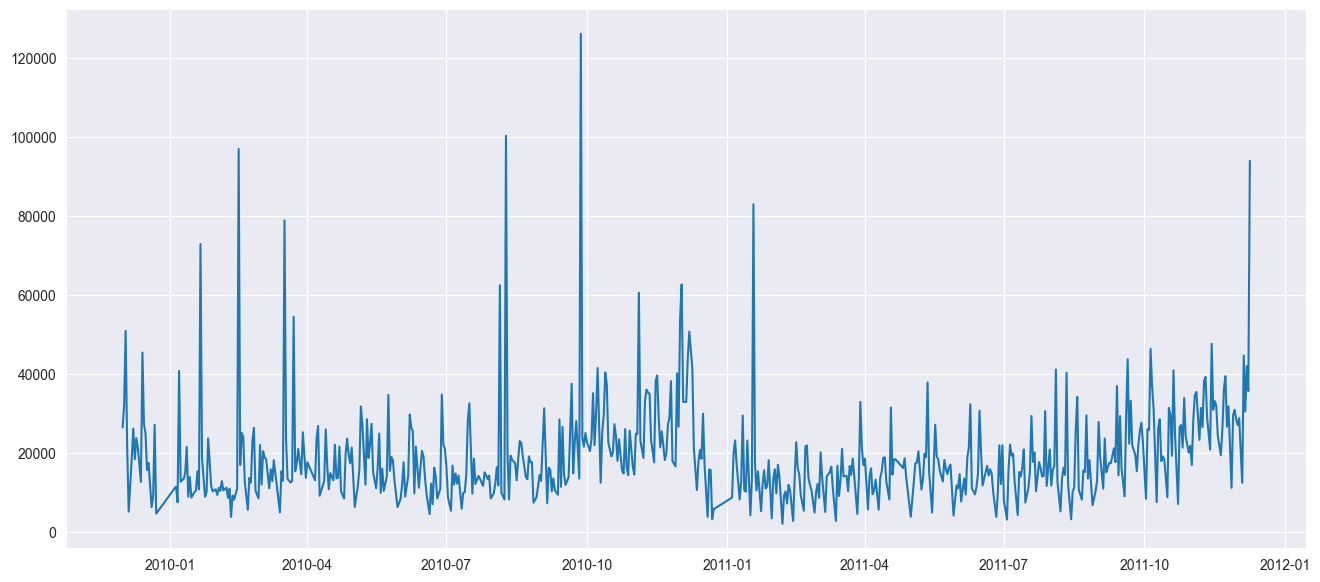

In [21]:
plt.figure(figsize=(16,7))
plt.plot(merged_daily["date"],merged_daily["Quantity"])


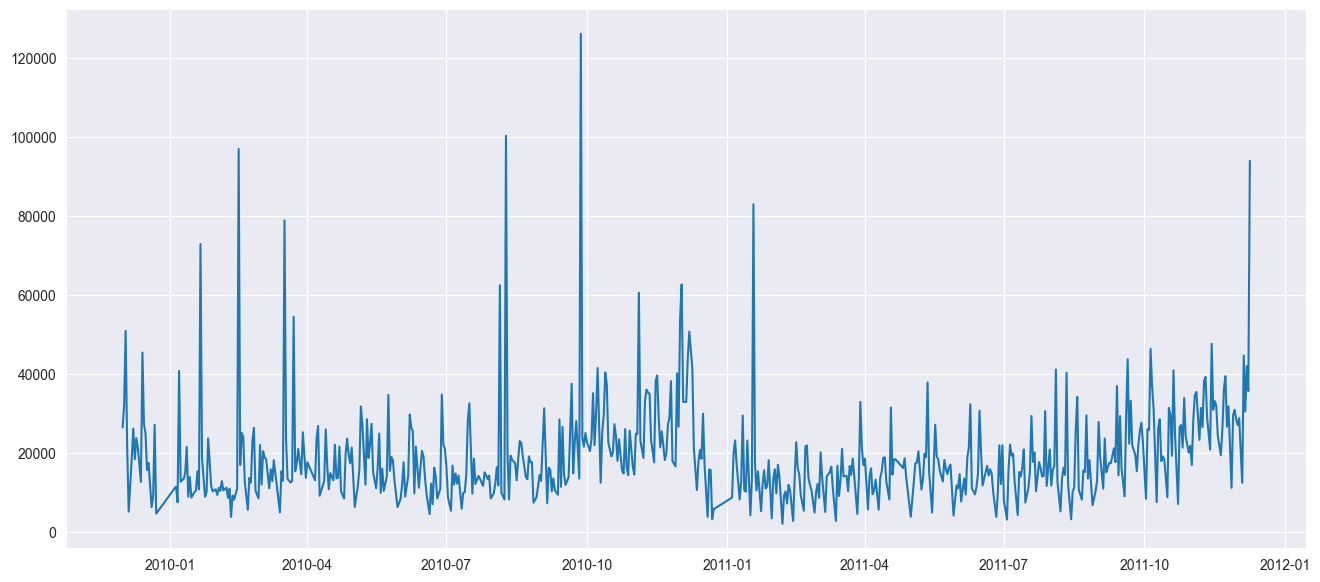

In [22]:
plt.figure(figsize=(16,7))
plt.plot(df["date"],df["Quantity"]);

In [23]:
# df.to_csv("uk_daily_sales_full.csv")

## UK Dataset Preprocessing

In [25]:
df = pd.read_csv("uk_daily_sales_full.csv")
df.isna().sum()

Unnamed: 0    0
date          0
Quantity      0
dtype: int64

In [26]:
df = pd.read_csv("uk_daily_sales_full.csv", parse_dates=['date'], index_col='date')
df =df.asfreq('D')
df.head(10)

,Unnamed: 0,Quantity
date,,
2009-12-01,0,26434.0
2009-12-02,1,31938.0
2009-12-03,2,50898.0
2009-12-04,3,21405.0
2009-12-05,4,5119.0
2009-12-06,5,11623.0
2009-12-07,6,18557.0
2009-12-08,7,26172.0
2009-12-09,8,18403.0


In [27]:
def plot_graph(data):
    plt.figure(figsize=(12,6))
    plt.plot(data["quantity"]);

In [28]:
df = df[["Quantity"]]
df.rename(columns={"Quantity":"quantity"},inplace=True)
df.head(5)

,quantity
date,
2009-12-01,26434.0
2009-12-02,31938.0
2009-12-03,50898.0
2009-12-04,21405.0
2009-12-05,5119.0


In [29]:
import holidays
# Function to create date features
def create_date_features(data):
    data["month"] = data.index.month
    data["day_of_month"] = data.index.day
    data["is_month_start"] = data.index.is_month_start.astype(int)
    data["is_month_end"] = data.index.is_month_end.astype(int)
    data["day_of_year"] = data.index.dayofyear
    data["week_of_year"] = data.index.isocalendar().week
    data["day_of_week"] = data.index.dayofweek + 1
    data["year"] = data.index.year
    data["is_weekend"] = data.index.weekday
    data['is_spring'] = data['month'].isin([3, 4, 5]).astype(int)
    data['is_summer'] = data['month'].isin([6, 7, 8]).astype(int)
    data['is_fall'] = data['month'].isin([9, 10, 11]).astype(int)
    data['is_winter'] = data['month'].isin([12, 1, 2]).astype(int)
    data['sin_day'] = np.sin(2 * np.pi * data.index.dayofweek / 7)
    data['cos_day'] = np.cos(2 * np.pi * data.index.dayofweek / 7)
    return data

In [30]:
df = create_date_features(df)
df.head(5)

,quantity,month,day_of_month,is_month_start,is_month_end,day_of_year,week_of_year,day_of_week,year,is_weekend,is_spring,is_summer,is_fall,is_winter,sin_day,cos_day
date,,,,,,,,,,,,,,,,
2009-12-01,26434.0,12,1,1,0,335,49,2,2009,1,0,0,0,1,0.781831,0.623490
2009-12-02,31938.0,12,2,0,0,336,49,3,2009,2,0,0,0,1,0.974928,-0.222521
2009-12-03,50898.0,12,3,0,0,337,49,4,2009,3,0,0,0,1,0.433884,-0.900969
2009-12-04,21405.0,12,4,0,0,338,49,5,2009,4,0,0,0,1,-0.433884,-0.900969
2009-12-05,5119.0,12,5,0,0,339,49,6,2009,5,0,0,0,1,-0.974928,-0.222521


In [31]:
#Add holidays
 # Determine public holidays
holiday = holidays.UK()
df['is_public_holiday'] = df.index.map(lambda x: 1 if x in holiday else 0)

In [32]:
def create_lag_and_window_features(data, target_col):
    """
    Create lag and window features for a given DataFrame and target column.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    target_col (str): The name of the target column to create features for.

    Returns:
    pd.DataFrame: DataFrame with lag and window features.
    """
    # Create lag features for the past week
    for i in range(1, 8):
        data[f'lag_{i}'] = data[target_col].shift(i)

    # Rolling window statistics for 7 days
    data['rolling_mean_7'] = data[target_col].rolling(window=7).mean()
    data['rolling_sum_7'] = data[target_col].rolling(window=7).sum()
    data['rolling_std_7'] = data[target_col].rolling(window=7).std()

    # Rolling window statistics for 30 days
    data['rolling_mean_30'] = data[target_col].rolling(window=30).mean()
    data['rolling_sum_30'] = data[target_col].rolling(window=30).sum()
    data['rolling_std_30'] = data[target_col].rolling(window=30).std()

    # Expanding window statistics
    data['expanding_sum'] = data[target_col].expanding().sum()

    return data

In [33]:
df = create_lag_and_window_features(df, 'quantity')
df.head(5)

,quantity,month,day_of_month,is_month_start,is_month_end,day_of_year,week_of_year,day_of_week,year,is_weekend,...,lag_5,lag_6,lag_7,rolling_mean_7,rolling_sum_7,rolling_std_7,rolling_mean_30,rolling_sum_30,rolling_std_30,expanding_sum
date,,,,,,,,,,,,,,,,,,,,,
2009-12-01,26434.0,12,1,1,0,335,49,2,2009,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26434.0
2009-12-02,31938.0,12,2,0,0,336,49,3,2009,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58372.0
2009-12-03,50898.0,12,3,0,0,337,49,4,2009,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109270.0
2009-12-04,21405.0,12,4,0,0,338,49,5,2009,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130675.0
2009-12-05,5119.0,12,5,0,0,339,49,6,2009,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135794.0


In [34]:
# Fill any remaining NaN values
df = df.fillna(method='bfill')
df.head(5)

,quantity,month,day_of_month,is_month_start,is_month_end,day_of_year,week_of_year,day_of_week,year,is_weekend,...,lag_5,lag_6,lag_7,rolling_mean_7,rolling_sum_7,rolling_std_7,rolling_mean_30,rolling_sum_30,rolling_std_30,expanding_sum
date,,,,,,,,,,,,,,,,,,,,,
2009-12-01,26434.0,12,1,1,0,335,49,2,2009,1,...,26434.0,26434.0,26434.0,23710.571429,165974.0,14932.597372,17233.666667,517010.0,12220.541413,26434.0
2009-12-02,31938.0,12,2,0,0,336,49,3,2009,2,...,26434.0,26434.0,26434.0,23710.571429,165974.0,14932.597372,17233.666667,517010.0,12220.541413,58372.0
2009-12-03,50898.0,12,3,0,0,337,49,4,2009,3,...,26434.0,26434.0,26434.0,23710.571429,165974.0,14932.597372,17233.666667,517010.0,12220.541413,109270.0
2009-12-04,21405.0,12,4,0,0,338,49,5,2009,4,...,26434.0,26434.0,26434.0,23710.571429,165974.0,14932.597372,17233.666667,517010.0,12220.541413,130675.0
2009-12-05,5119.0,12,5,0,0,339,49,6,2009,5,...,26434.0,26434.0,26434.0,23710.571429,165974.0,14932.597372,17233.666667,517010.0,12220.541413,135794.0


## Outlier detection

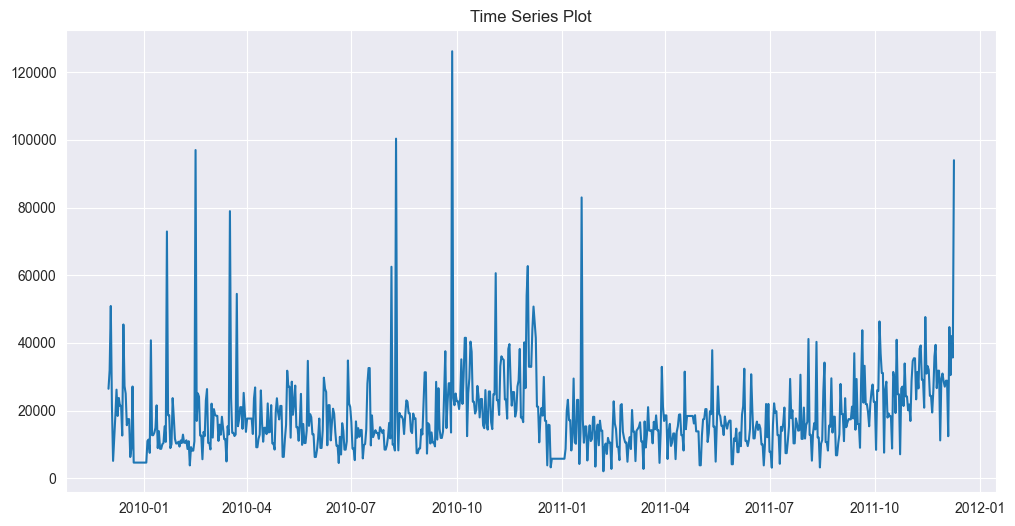

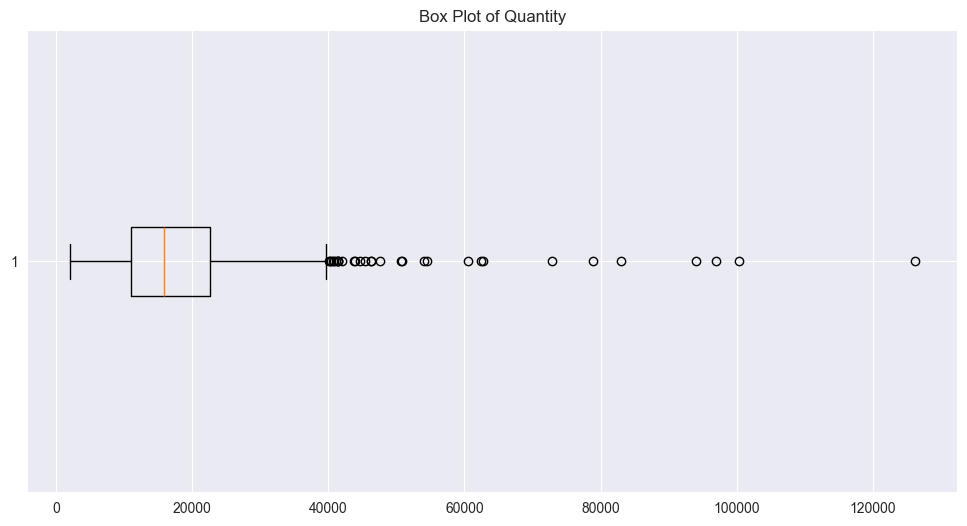

In [35]:
# Line plot
plt.figure(figsize=(12, 6))
plt.plot(df['quantity'])
plt.title('Time Series Plot')
plt.show()

# Box plot
plt.figure(figsize=(12, 6))
plt.boxplot(df['quantity'], vert=False)
plt.title('Box Plot of Quantity')
plt.show();

In [36]:
# Set winsorization threshold
threshold = 60000

# Winsorize the 'quantity' column
df['quantity_winsorized'] = df['quantity'].where(df['quantity'] <= threshold, threshold)
df.head(5)

,quantity,month,day_of_month,is_month_start,is_month_end,day_of_year,week_of_year,day_of_week,year,is_weekend,...,lag_6,lag_7,rolling_mean_7,rolling_sum_7,rolling_std_7,rolling_mean_30,rolling_sum_30,rolling_std_30,expanding_sum,quantity_winsorized
date,,,,,,,,,,,,,,,,,,,,,
2009-12-01,26434.0,12,1,1,0,335,49,2,2009,1,...,26434.0,26434.0,23710.571429,165974.0,14932.597372,17233.666667,517010.0,12220.541413,26434.0,26434.0
2009-12-02,31938.0,12,2,0,0,336,49,3,2009,2,...,26434.0,26434.0,23710.571429,165974.0,14932.597372,17233.666667,517010.0,12220.541413,58372.0,31938.0
2009-12-03,50898.0,12,3,0,0,337,49,4,2009,3,...,26434.0,26434.0,23710.571429,165974.0,14932.597372,17233.666667,517010.0,12220.541413,109270.0,50898.0
2009-12-04,21405.0,12,4,0,0,338,49,5,2009,4,...,26434.0,26434.0,23710.571429,165974.0,14932.597372,17233.666667,517010.0,12220.541413,130675.0,21405.0
2009-12-05,5119.0,12,5,0,0,339,49,6,2009,5,...,26434.0,26434.0,23710.571429,165974.0,14932.597372,17233.666667,517010.0,12220.541413,135794.0,5119.0


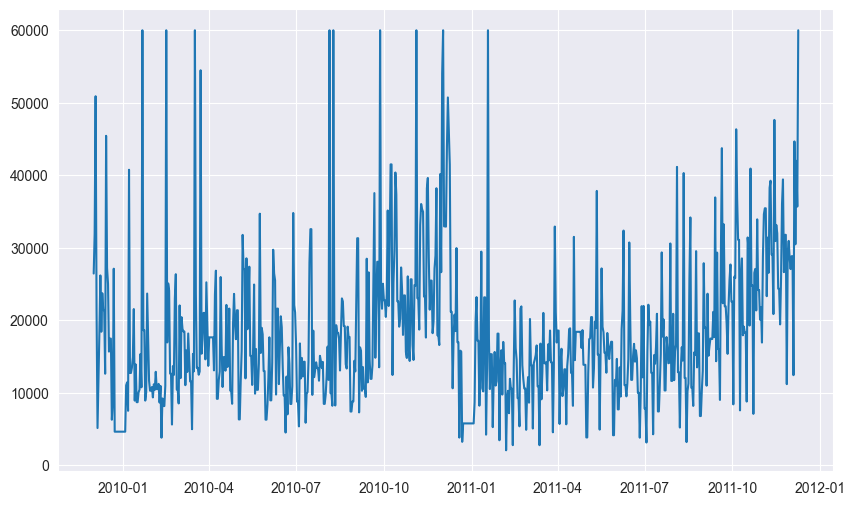

In [37]:
plt.figure(figsize=(10,6))
plt.plot(df["quantity_winsorized"]);

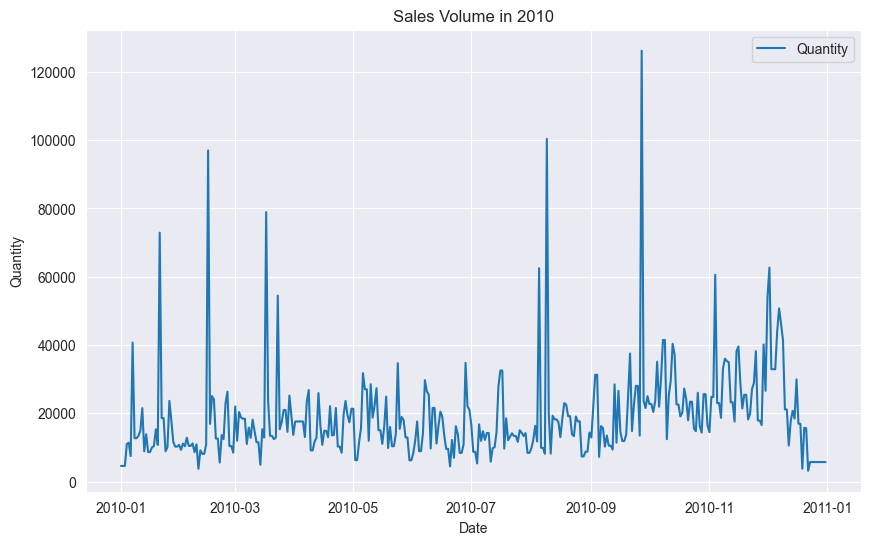

In [38]:
df_2010 = df[df['year'] == 2010]

# Plot the 'quantity' column for the year 2010
plt.figure(figsize=(10, 6))
plt.plot(df_2010['quantity'], label='Quantity')
plt.title('Sales Volume in 2010')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show();

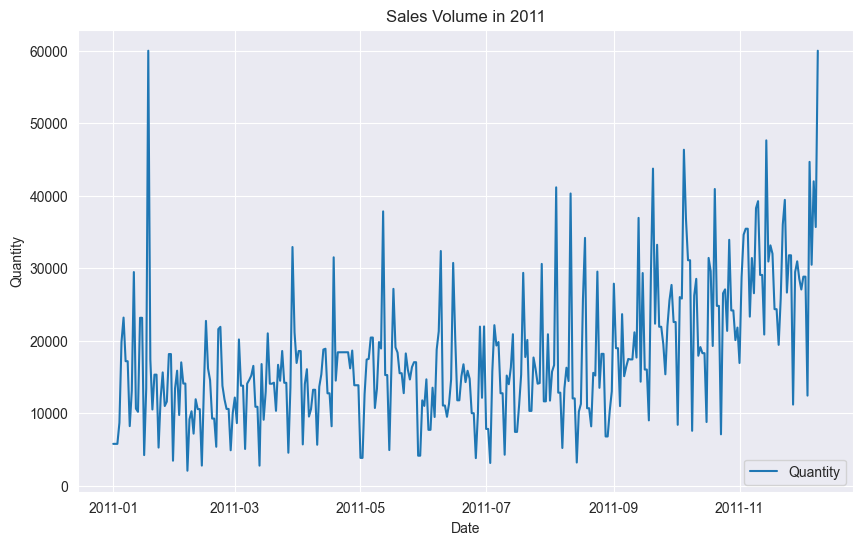

In [39]:
df_2011 = df[df['year'] == 2011]

# Plot the 'quantity' column for the year 2010
plt.figure(figsize=(10, 6))
plt.plot(df_2011['quantity_winsorized'], label='Quantity')
plt.title('Sales Volume in 2011')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show();

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 739 entries, 2009-12-01 to 2011-12-09
Freq: D
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   quantity             739 non-null    float64
 1   month                739 non-null    int32  
 2   day_of_month         739 non-null    int32  
 3   is_month_start       739 non-null    int32  
 4   is_month_end         739 non-null    int32  
 5   day_of_year          739 non-null    int32  
 6   week_of_year         739 non-null    UInt32 
 7   day_of_week          739 non-null    int32  
 8   year                 739 non-null    int32  
 9   is_weekend           739 non-null    int32  
 10  is_spring            739 non-null    int32  
 11  is_summer            739 non-null    int32  
 12  is_fall              739 non-null    int32  
 13  is_winter            739 non-null    int32  
 14  sin_day              739 non-null    float64
 15  cos_day      

In [43]:
df.describe()

,quantity,month,day_of_month,is_month_start,is_month_end,day_of_year,week_of_year,day_of_week,year,is_weekend,...,lag_6,lag_7,rolling_mean_7,rolling_sum_7,rolling_std_7,rolling_mean_30,rolling_sum_30,rolling_std_30,expanding_sum,quantity_winsorized
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.0,739.000000,739.000000,739.000000,...,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,7.390000e+02,739.000000
mean,18460.820027,6.592693,15.589986,0.033829,0.032476,184.899865,26.872801,3.997294,2010.422192,2.997294,...,18324.726658,18321.491204,18322.520201,128257.641407,8113.471223,18038.013081,541140.392422,9894.871992,6.509263e+06,18138.614344
std,12068.869114,3.481348,8.831820,0.180913,0.177381,106.183335,15.213924,1.997965,0.572964,1.997965,...,11666.268169,11663.683406,6776.290299,47434.032091,6494.645611,4957.581386,148727.441583,4272.461647,3.835490e+06,10283.143444
min,2048.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,2009.000000,0.000000,...,2048.000000,2048.000000,4614.000000,32298.000000,0.000000,10138.866667,304166.000000,4186.255858,2.643400e+04,2048.000000
25%,11055.000000,4.000000,8.000000,0.000000,0.000000,93.000000,14.0,2.000000,2010.000000,1.000000,...,11055.000000,11055.000000,13617.285714,95321.000000,4583.748988,14636.433333,439093.000000,6607.784819,3.071784e+06,11055.000000
50%,15851.000000,7.000000,16.000000,0.000000,0.000000,185.000000,27.0,4.000000,2010.000000,3.000000,...,15991.000000,15991.000000,16818.000000,117726.000000,6731.621690,16288.733333,488662.000000,8330.944744,6.991844e+06,15851.000000
75%,22586.000000,10.000000,23.000000,0.000000,0.000000,277.500000,40.0,6.000000,2011.000000,5.000000,...,22597.500000,22597.500000,22222.285714,155556.000000,9250.555531,19434.283333,583028.500000,12673.643029,9.722822e+06,22586.000000
max,126182.000000,12.000000,31.000000,1.000000,1.000000,365.000000,53.0,7.000000,2011.000000,6.000000,...,126182.000000,126182.000000,44304.000000,310128.000000,39877.677574,32180.133333,965404.000000,21471.097839,1.364255e+07,60000.000000


In [ ]:
df.to_csv("processed_full.csv")